## Checking Files and Variables

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Read the student-level file
stu = pd.read_sas("../data/STU_QQQ_SAS/CY08MSP_STU_QQQ.SAS7BDAT", format='sas7bdat', encoding='latin1')

# Inspect the columns
print(stu.columns.tolist()[:50])  # first 50 columns
print(stu.shape)
stu.head()


['CNT', 'CNTRYID', 'CNTSCHID', 'CNTSTUID', 'CYC', 'NatCen', 'STRATUM', 'SUBNATIO', 'REGION', 'OECD', 'ADMINMODE', 'LANGTEST_QQQ', 'LANGTEST_COG', 'LANGTEST_PAQ', 'Option_CT', 'Option_FL', 'Option_ICTQ', 'Option_WBQ', 'Option_PQ', 'Option_TQ', 'Option_UH', 'BOOKID', 'ST001D01T', 'ST003D02T', 'ST003D03T', 'ST004D01T', 'ST250Q01JA', 'ST250Q02JA', 'ST250Q03JA', 'ST250Q04JA', 'ST250Q05JA', 'ST250D06JA', 'ST250D07JA', 'ST251Q01JA', 'ST251Q02JA', 'ST251Q03JA', 'ST251Q04JA', 'ST251Q06JA', 'ST251Q07JA', 'ST251D08JA', 'ST251D09JA', 'ST253Q01JA', 'ST254Q01JA', 'ST254Q02JA', 'ST254Q03JA', 'ST254Q04JA', 'ST254Q05JA', 'ST254Q06JA', 'ST255Q01JA', 'ST256Q01JA']
(613744, 1278)


,CNT,CNTRYID,CNTSCHID,CNTSTUID,CYC,NatCen,STRATUM,SUBNATIO,REGION,OECD,...,PV3MPRE,PV4MPRE,PV5MPRE,PV6MPRE,PV7MPRE,PV8MPRE,PV9MPRE,PV10MPRE,SENWT,VER_DAT
0,ALB,8.0,800282.0,800001.0,08MS,000800,ALB03,0080000,800.0,0.0,...,226.250,203.029,219.817,331.017,223.752,305.671,230.156,289.436,0.55561,03MAY23:10:11:25
1,ALB,8.0,800115.0,800002.0,08MS,000800,ALB03,0080000,800.0,0.0,...,298.644,321.405,320.452,284.836,364.565,304.044,347.626,352.269,0.76431,03MAY23:10:11:25
2,ALB,8.0,800242.0,800003.0,08MS,000800,ALB01,0080000,800.0,0.0,...,383.340,376.019,285.901,289.896,338.469,316.296,324.361,343.351,1.37877,03MAY23:10:11:25
3,ALB,8.0,800245.0,800005.0,08MS,000800,ALB08,0080000,800.0,0.0,...,264.532,303.422,327.793,165.575,246.156,238.322,275.860,227.466,1.49361,03MAY23:10:11:26
4,ALB,8.0,800285.0,800006.0,08MS,000800,ALB03,0080000,800.0,0.0,...,399.300,514.739,539.850,461.793,514.465,510.462,490.537,503.793,0.65249,03MAY23:10:11:26


In [3]:
key_vars = [c for c in stu.columns if any(k in c for k in ["ESCS", "PV1MATH", "PV1READ", "PV1SCIE", "W_FSTUWT"])]
print(key_vars)

['ESCS', 'W_FSTUWT', 'PV1MATH', 'PV1READ', 'PV1SCIE']


In [4]:
# Check which countries exist
print(stu['CNT'].unique())

# Quick look at Singapore sample
sgp = stu[stu['CNT'] == 'SGP']
print(sgp[['ESCS', 'PV1MATH', 'W_FSTUWT']].describe())

['ALB' 'QAZ' 'ARG' 'AUS' 'AUT' 'BEL' 'BRA' 'BRN' 'BGR' 'KHM' 'CAN' 'CHL'
 'TAP' 'COL' 'CRI' 'HRV' 'CZE' 'DNK' 'DOM' 'SLV' 'EST' 'FIN' 'FRA' 'GEO'
 'PSE' 'DEU' 'GRC' 'GTM' 'HKG' 'HUN' 'ISL' 'IDN' 'IRL' 'ISR' 'ITA' 'KSV'
 'JAM' 'JPN' 'KAZ' 'JOR' 'KOR' 'LVA' 'LTU' 'MAC' 'MYS' 'MLT' 'MEX' 'MNG'
 'MDA' 'MNE' 'MAR' 'NLD' 'NZL' 'NOR' 'PAN' 'PRY' 'PER' 'PHL' 'POL' 'PRT'
 'QAT' 'ROU' 'SAU' 'SRB' 'SGP' 'SVK' 'VNM' 'SVN' 'ESP' 'SWE' 'CHE' 'THA'
 'ARE' 'TUR' 'QUR' 'MKD' 'GBR' 'USA' 'URY' 'UZB']
              ESCS      PV1MATH     W_FSTUWT
count  6559.000000  6606.000000  6606.000000
mean      0.290373   574.238768     6.351474
std       0.832615   102.744234     1.332973
min      -3.548800   218.571000     2.525000
25%      -0.232700   503.103500     5.417500
50%       0.481700   582.544000     6.350955
75%       0.903600   648.233500     7.018000
max       3.278000   943.041000    15.035350


## Create Top Level Visual for Presentation

SGP: SES–Achievement slope = 50.46
FIN: SES–Achievement slope = 38.63


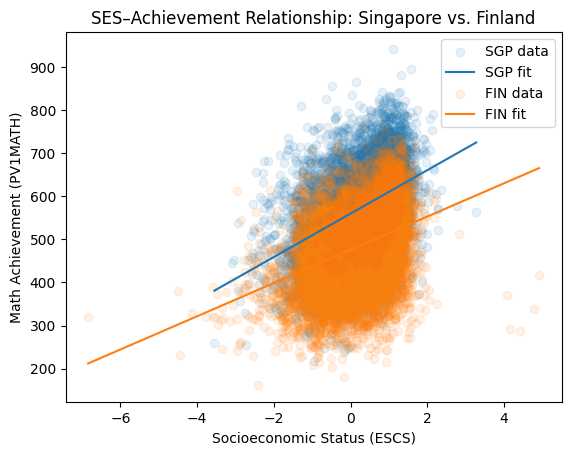

In [5]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Example: compare Singapore (early-tracking) and Finland (late-tracking)
for country in ['SGP', 'FIN']:
    sub = stu[stu['CNT'] == country][['ESCS', 'PV1MATH', 'W_FSTUWT']].dropna()
    X = sm.add_constant(sub['ESCS'])
    model = sm.WLS(sub['PV1MATH'], X, weights=sub['W_FSTUWT']).fit()
    slope = model.params['ESCS']
    print(f"{country}: SES–Achievement slope = {slope:.2f}")
    
    # For visualization
    plt.scatter(sub['ESCS'], sub['PV1MATH'], alpha=0.1, label=f'{country} data')
    x_vals = np.linspace(sub['ESCS'].min(), sub['ESCS'].max(), 100)
    plt.plot(x_vals, model.params['const'] + model.params['ESCS']*x_vals, label=f'{country} fit')

plt.xlabel("Socioeconomic Status (ESCS)")
plt.ylabel("Math Achievement (PV1MATH)")
plt.title("SES–Achievement Relationship: Singapore vs. Finland")
plt.legend()
plt.show()

## Step 1: Regression for the 10 Plausible Values (Math)

In [6]:
import pandas as pd
import statsmodels.api as sm

# 1. Define all Plausible Value and other necessary columns
country_id_var = 'CNT'
ses_var = 'ESCS'
weight_var = 'W_FSTUWT'

# List all 10 Math Plausible Values (PVs)
math_pv_vars = [f'PV{i}MATH' for i in range(1, 11)]

# Select the necessary columns
columns_to_keep = [country_id_var, ses_var, weight_var] + math_pv_vars
df_analysis = stu[columns_to_keep].copy()

# 2. Convert columns to numeric, coercing errors
# This step explicitly handles the TypeError we saw previously
for col in [ses_var, weight_var] + math_pv_vars:
    # 'coerce' will turn any non-numeric values (like SAS missing codes) into NaN
    df_analysis[col] = pd.to_numeric(df_analysis[col], errors='coerce')

# Drop rows with any missing values needed for the regression
df_analysis = df_analysis.dropna(subset=[ses_var, weight_var] + math_pv_vars)

# 3. Define the regression function
def calculate_ses_slope(group, pv_var):
    """
    Performs weighted OLS regression for a single country and a single PV.
    Returns the SES coefficient (slope) and its standard error.
    """
    # Define Independent (X) and Dependent (Y) variables
    X = sm.add_constant(group[ses_var]) # Add constant for intercept
    Y = group[pv_var]
    weights = group[weight_var]

    # Run the weighted OLS regression
    model = sm.WLS(Y, X, weights=weights)
    results = model.fit()

    # Extract the SES coefficient (slope) and standard error
    slope = results.params[ses_var]
    std_err = results.bse[ses_var]

    return pd.Series({'SES_Slope': slope, 'SES_StdErr': std_err})

# 4. Apply the function to all countries and all 10 PVs

# Create an empty DataFrame to store the results
slopes_df = pd.DataFrame()

print("\nRunning Weighted OLS Regression for all countries and 10 Math PVs...")

# Loop through each Plausible Value
for pv in math_pv_vars:
    # Group by country and apply the regression function
    temp_results = df_analysis.groupby(country_id_var).apply(
        lambda x: calculate_ses_slope(x, pv)
    )
    # Rename columns to reflect the PV used
    temp_results = temp_results.rename(columns={
        'SES_Slope': f'Slope_{pv}',
        'SES_StdErr': f'StdErr_{pv}'
    })

    # Join results for this PV to the main slopes DataFrame
    if slopes_df.empty:
        slopes_df = temp_results
    else:
        slopes_df = slopes_df.join(temp_results)

print("---")
print("First 5 rows of the calculated SES-Achievement Slopes (Math):")
print(slopes_df.head())
print(f"\nTotal countries with calculated slopes: {len(slopes_df)}")


Running Weighted OLS Regression for all countries and 10 Math PVs...


/var/folders/b0/czsnk64s6wdcpxlyxxbmgxv80000gn/T/ipykernel_8933/263273219.py:56: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  temp_results = df_analysis.groupby(country_id_var).apply(
/var/folders/b0/czsnk64s6wdcpxlyxxbmgxv80000gn/T/ipykernel_8933/263273219.py:56: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  temp_results = df_analysis.groupby(country_id_var).apply(
/var/folders/b0/czsnk64s6wdcpxlyxxbmgxv80000gn/T/i

---
First 5 rows of the calculated SES-Achievement Slopes (Math):
     Slope_PV1MATH  StdErr_PV1MATH  Slope_PV2MATH  StdErr_PV2MATH  \
CNT                                                                 
ALB      17.225102        1.028628      17.035330        1.023024   
ARE      32.624045        0.864310      32.897304        0.858692   
ARG      25.564958        0.559936      26.066911        0.556540   
AUS      44.906106        0.950398      45.284483        0.953324   
AUT      42.670128        1.139654      42.819651        1.151218   

     Slope_PV3MATH  StdErr_PV3MATH  Slope_PV4MATH  StdErr_PV4MATH  \
CNT                                                                 
ALB      17.144249        1.043043      16.165743        1.020781   
ARE      32.813404        0.857335      32.823169        0.860408   
ARG      25.288669        0.556685      25.956132        0.553135   
AUS      44.747009        0.944704      44.511157        0.950793   
AUT      43.067575        1.140230  

/var/folders/b0/czsnk64s6wdcpxlyxxbmgxv80000gn/T/ipykernel_8933/263273219.py:56: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  temp_results = df_analysis.groupby(country_id_var).apply(
/var/folders/b0/czsnk64s6wdcpxlyxxbmgxv80000gn/T/ipykernel_8933/263273219.py:56: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  temp_results = df_analysis.groupby(country_id_var).apply(


In [7]:
import numpy as np
import pandas as pd

# The slopes_df is assumed to be the DataFrame produced in the last step
# with columns like 'Slope_PV1MATH', 'StdErr_PV1MATH', etc.

M = 10 # Number of Plausible Values

# 1. Select the slope and standard error columns
slope_cols = [col for col in slopes_df.columns if 'Slope' in col]
stderr_cols = [col for col in slopes_df.columns if 'StdErr' in col]

# Extract the values into NumPy arrays for efficient calculation
BETA_m = slopes_df[slope_cols].values
VAR_m = slopes_df[stderr_cols].values ** 2 # Variance is StdErr squared

# --- Calculate Pooled Slope (Average) ---
# Sum across the M=10 PVs and divide by M
pooled_beta = np.mean(BETA_m, axis=1)

# --- Calculate Total Variance ---

# 2a. Within-PV Variance (U_bar): Average of the individual variances
U_bar = np.mean(VAR_m, axis=1)

# 2b. Between-PV Variance (B): Variance of the 10 slope estimates
# np.var calculates the population variance (divides by M), but the formula needs
# an adjustment factor for the sample variance (divides by M-1).
# The formula term is: (1 + 1/M) * [1 / (M-1)] * sum( (beta_m - avg_beta)^2 )
# We can simplify this: (1 + 1/M) * (sample variance of betas)
# Note: np.var(..., ddof=1) calculates the sample variance (divides by M-1)

# Calculate the sample variance of the 10 slopes for each country
sample_variance_of_betas = np.var(BETA_m, axis=1, ddof=1) 

# The full formula for the between-PV term (B)
B = (1 + 1/M) * sample_variance_of_betas

# Total Variance (T) = U_bar + B
total_variance = U_bar + B

# Final Standard Error (SE) is the square root of the total variance
final_se = np.sqrt(total_variance)


# 3. Create the final Country-Level DataFrame
pooled_slopes_math = pd.DataFrame({
    'CNT': slopes_df.index,
    'SES_SLOPE_MATH': pooled_beta,
    'SES_SLOPE_SE': final_se
}).set_index('CNT')

print("---")
print("Pooled SES-Achievement Slopes (Final Dependent Variable):")
print(pooled_slopes_math.head())
print(f"\nTotal countries in final dataset: {len(pooled_slopes_math)}")

---
Pooled SES-Achievement Slopes (Final Dependent Variable):
     SES_SLOPE_MATH  SES_SLOPE_SE
CNT                              
ALB       16.678251      1.123629
ARE       32.557514      0.951850
ARG       25.687697      0.651899
AUS       44.740466      1.084540
AUT       43.265897      1.236458

Total countries in final dataset: 79


## Step 2A: Prepare for the Country Level Regression
- Calculate the mean math score: Educational systems that achieve high average scores often have different policies. This controls for the country's overall performance level, ensuring your tracking effect isn't just a proxy for high-performing systems.
- GDP per capita: Economic development is strongly correlated with both tracking policies and achievement disparities. This controls for national wealth, ensuring your tracking effect is not simply a proxy for richer countries.
- Tracking Age: This is the variable testing your main hypothesis. You hypothesize that a higher (later) age will lead to a lower (flatter) SES-Slope.

In [8]:
import pandas as pd
import numpy as np

# Re-load the data (assuming stu is not in the environment)
# NOTE: Using the corrected relative path
try:
    stu = pd.read_sas("../data/STU_QQQ_SAS/CY08MSP_STU_QQQ.SAS7BDAT", format='sas7bdat', encoding='latin1')
except FileNotFoundError:
    print("Error: Please verify the file path to CY08MSP_STU_QQQ.SAS7BDAT.")
    # Stop execution if file is not found

country_id_var = 'CNT'
pv_var = 'PV1MATH'
weight_var = 'W_FSTUWT'

# Convert necessary columns to numeric
stu[pv_var] = pd.to_numeric(stu[pv_var], errors='coerce')
stu[weight_var] = pd.to_numeric(stu[weight_var], errors='coerce')

# Drop missing values needed for this calculation
df_mean = stu[[country_id_var, pv_var, weight_var]].dropna()

# 1. Calculate the SUM of (PV1MATH * W_FSTUWT) for each country
weighted_sum = df_mean.groupby(country_id_var).apply(
    lambda x: (x[pv_var] * x[weight_var]).sum()
)

# 2. Calculate the SUM of W_FSTUWT (total weight) for each country
total_weight = df_mean.groupby(country_id_var)[weight_var].sum()

# 3. Calculate the Weighted Mean = Weighted Sum / Total Weight
mean_math_scores = (weighted_sum / total_weight).rename('Mean_Math_Score')

print("---")
print("Weighted Mean Math Scores per Country (Internal Control):")
print(mean_math_scores.head())
print(f"\nTotal countries with mean score: {len(mean_math_scores)}")

---
Weighted Mean Math Scores per Country (Internal Control):
CNT
ALB    368.352188
ARE    431.496902
ARG    377.967326
AUS    486.553774
AUT    487.593331
Name: Mean_Math_Score, dtype: float64

Total countries with mean score: 80


/var/folders/b0/czsnk64s6wdcpxlyxxbmgxv80000gn/T/ipykernel_8933/979470498.py:24: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_sum = df_mean.groupby(country_id_var).apply(
